In [1]:
import pandas as pd

 # The data imported here is the S&P500 at a timeframe of 5 minutes interval.

In [2]:
df = pd.read_excel(r"C:\Users\HP\OneDrive\Documents\S&P500Index_v2.xlsx")
df

,Name,Date,Day,Open,High,Low,Close
0,SPX.GI,2019-12-09 09:35:00,2019-12-09,3141.86,3143.41,3140.91,3143.41
1,SPX.GI,2019-12-09 09:40:00,2019-12-09,3143.54,3146.64,3142.95,3146.39
2,SPX.GI,2019-12-09 09:45:00,2019-12-09,3146.34,3148.04,3146.32,3147.96
3,SPX.GI,2019-12-09 09:50:00,2019-12-09,3147.92,3148.38,3147.23,3147.34
4,SPX.GI,2019-12-09 09:55:00,2019-12-09,3147.36,3148.15,3146.96,3147.80
...,...,...,...,...,...,...,...
57138,SPX.GI,2022-11-11 15:40:00,2022-11-11,3988.72,3995.15,3988.08,3994.93
57139,SPX.GI,2022-11-11 15:45:00,2022-11-11,3994.89,3997.88,3994.41,3997.82
57140,SPX.GI,2022-11-11 15:50:00,2022-11-11,3997.87,4001.28,3996.24,3999.07
57141,SPX.GI,2022-11-11 15:55:00,2022-11-11,3999.06,4000.29,3993.02,3994.29


In [3]:
df.drop(["Day" , "Name"],axis = 1 , inplace = True)

In [6]:
df['prediction'] = df.Close.shift(-1)
df

,Date,Open,High,Low,Close,prediction
0,2019-12-09 09:35:00,3141.86,3143.41,3140.91,3143.41,3146.39
1,2019-12-09 09:40:00,3143.54,3146.64,3142.95,3146.39,3147.96
2,2019-12-09 09:45:00,3146.34,3148.04,3146.32,3147.96,3147.34
3,2019-12-09 09:50:00,3147.92,3148.38,3147.23,3147.34,3147.80
4,2019-12-09 09:55:00,3147.36,3148.15,3146.96,3147.80,3147.20
...,...,...,...,...,...,...
57138,2022-11-11 15:40:00,3988.72,3995.15,3988.08,3994.93,3997.82
57139,2022-11-11 15:45:00,3994.89,3997.88,3994.41,3997.82,3999.07
57140,2022-11-11 15:50:00,3997.87,4001.28,3996.24,3999.07,3994.29
57141,2022-11-11 15:55:00,3999.06,4000.29,3993.02,3994.29,3992.93


In [7]:
pd.Date = pd.to_datetime(df.Date)

In [8]:
df.set_index('Date' , inplace = True)
df

,Open,High,Low,Close,prediction
Date,,,,,
2019-12-09 09:35:00,3141.86,3143.41,3140.91,3143.41,3146.39
2019-12-09 09:40:00,3143.54,3146.64,3142.95,3146.39,3147.96
2019-12-09 09:45:00,3146.34,3148.04,3146.32,3147.96,3147.34
2019-12-09 09:50:00,3147.92,3148.38,3147.23,3147.34,3147.80
2019-12-09 09:55:00,3147.36,3148.15,3146.96,3147.80,3147.20
...,...,...,...,...,...
2022-11-11 15:40:00,3988.72,3995.15,3988.08,3994.93,3997.82
2022-11-11 15:45:00,3994.89,3997.88,3994.41,3997.82,3999.07
2022-11-11 15:50:00,3997.87,4001.28,3996.24,3999.07,3994.29


In [9]:
df.dropna( inplace = True)

# EMA stands for Exponential mooving average which gives us an average closing price of past 10 records, giving more weightage to the nearer ones.
# formulae = EMA = CLOSE(current)*X + (1-X)*EMA_prev   where (X = 2/1+N) 

In [10]:
df['EMA'] = df['Close'].ewm(span=10, adjust=False).mean()
df

,Open,High,Low,Close,prediction,EMA
Date,,,,,,
2019-12-09 09:35:00,3141.86,3143.41,3140.91,3143.41,3146.39,3143.410000
2019-12-09 09:40:00,3143.54,3146.64,3142.95,3146.39,3147.96,3143.951818
2019-12-09 09:45:00,3146.34,3148.04,3146.32,3147.96,3147.34,3144.680579
2019-12-09 09:50:00,3147.92,3148.38,3147.23,3147.34,3147.80,3145.164110
2019-12-09 09:55:00,3147.36,3148.15,3146.96,3147.80,3147.20,3145.643362
...,...,...,...,...,...,...
2022-11-11 15:35:00,3994.81,3997.38,3988.74,3988.74,3994.93,3991.154697
2022-11-11 15:40:00,3988.72,3995.15,3988.08,3994.93,3997.82,3991.841116
2022-11-11 15:45:00,3994.89,3997.88,3994.41,3997.82,3999.07,3992.928186


In [11]:
delta = df['Close'].diff()
window_length = 10
# Get rid of the first NaN value
delta = delta[1:]

# Separate positive and negative gains
gain = (delta.where(delta > 0, 0))
loss = (-delta.where(delta < 0, 0))

# Calculate the average gain and loss
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
df['RSI'] = 100 - (100 / (1 + rs))
df

,Open,High,Low,Close,prediction,EMA,RSI
Date,,,,,,,
2019-12-09 09:35:00,3141.86,3143.41,3140.91,3143.41,3146.39,3143.410000,NaN
2019-12-09 09:40:00,3143.54,3146.64,3142.95,3146.39,3147.96,3143.951818,100.000000
2019-12-09 09:45:00,3146.34,3148.04,3146.32,3147.96,3147.34,3144.680579,100.000000
2019-12-09 09:50:00,3147.92,3148.38,3147.23,3147.34,3147.80,3145.164110,88.007737
2019-12-09 09:55:00,3147.36,3148.15,3146.96,3147.80,3147.20,3145.643362,88.987567
...,...,...,...,...,...,...,...
2022-11-11 15:35:00,3994.81,3997.38,3988.74,3988.74,3994.93,3991.154697,37.281324
2022-11-11 15:40:00,3988.72,3995.15,3988.08,3994.93,3997.82,3991.841116,48.713398
2022-11-11 15:45:00,3994.89,3997.88,3994.41,3997.82,3999.07,3992.928186,48.068284


In [12]:
df.dropna(inplace = True)

In [13]:
df = df.rename(columns={'nectday_close': 'prediction'})
df

,Open,High,Low,Close,prediction,EMA,RSI
Date,,,,,,,
2019-12-09 09:40:00,3143.54,3146.64,3142.95,3146.39,3147.96,3143.951818,100.000000
2019-12-09 09:45:00,3146.34,3148.04,3146.32,3147.96,3147.34,3144.680579,100.000000
2019-12-09 09:50:00,3147.92,3148.38,3147.23,3147.34,3147.80,3145.164110,88.007737
2019-12-09 09:55:00,3147.36,3148.15,3146.96,3147.80,3147.20,3145.643362,88.987567
2019-12-09 10:00:00,3147.79,3148.25,3146.58,3147.20,3147.47,3145.926387,80.417335
...,...,...,...,...,...,...,...
2022-11-11 15:35:00,3994.81,3997.38,3988.74,3988.74,3994.93,3991.154697,37.281324
2022-11-11 15:40:00,3988.72,3995.15,3988.08,3994.93,3997.82,3991.841116,48.713398
2022-11-11 15:45:00,3994.89,3997.88,3994.41,3997.82,3999.07,3992.928186,48.068284


# MOMENTUM is an indicator which tells us the trend of the price of the index.

In [14]:
df['Momentum'] = df['Close'] - df['Close'].shift(5)

In [15]:
df.dropna(inplace = True)

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [17]:
df

,Open,High,Low,Close,prediction,EMA,RSI,Momentum
Date,,,,,,,,
2019-12-09 10:05:00,3147.26,3147.88,3147.10,3147.47,3147.69,3146.207044,81.230769,1.08
2019-12-09 10:10:00,3147.49,3148.17,3147.17,3147.69,3148.49,3146.476673,81.845238,-0.27
2019-12-09 10:15:00,3147.75,3148.77,3147.66,3148.49,3147.77,3146.842732,83.776596,1.15
2019-12-09 10:20:00,3148.43,3148.87,3147.68,3147.77,3147.19,3147.011326,76.456311,-0.03
2019-12-09 10:25:00,3147.78,3148.01,3147.03,3147.19,3147.03,3147.043812,71.428571,-0.01
...,...,...,...,...,...,...,...,...
2022-11-11 15:35:00,3994.81,3997.38,3988.74,3988.74,3994.93,3991.154697,37.281324,1.91
2022-11-11 15:40:00,3988.72,3995.15,3988.08,3994.93,3997.82,3991.841116,48.713398,12.51
2022-11-11 15:45:00,3994.89,3997.88,3994.41,3997.82,3999.07,3992.928186,48.068284,9.08


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
split_index = int(0.8 * len(df))

# Split the data
train_df = df[:split_index]  # First 80% rows
test_df = df[split_index:]   # Remaining 20% rows

# If you have separate features and target columns
X_train = train_df.drop('prediction', axis=1)
y_train = train_df['prediction']

X_test = test_df.drop('prediction', axis=1)
y_test = test_df['prediction']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [21]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error: 63.84115083586259
R² Score: 0.9984426894235566


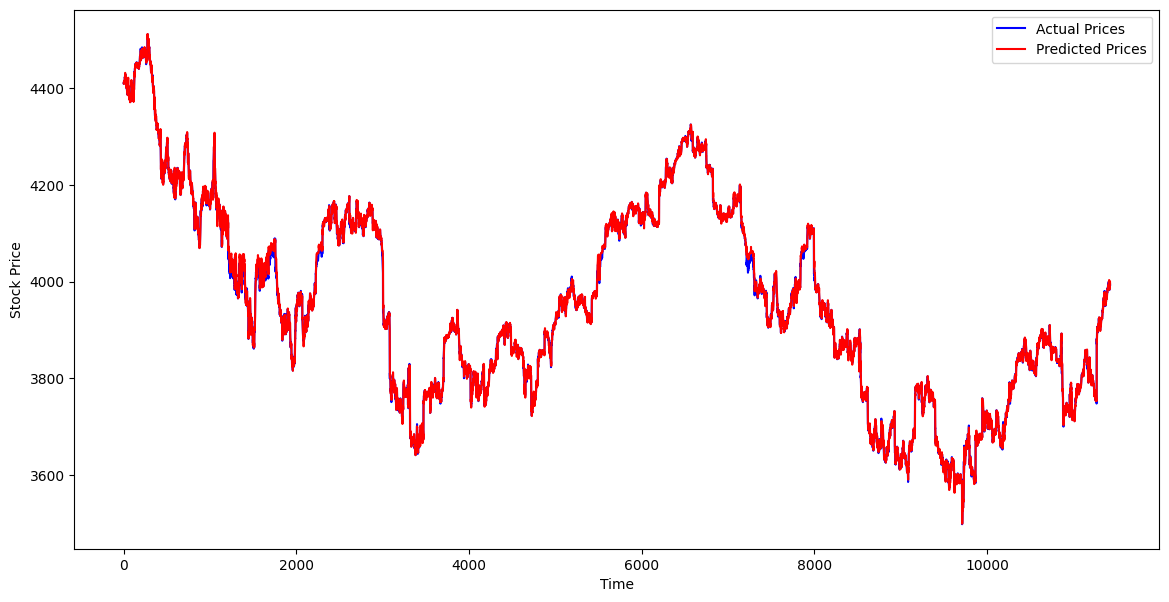

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, color='blue', label='Actual Prices')
plt.plot(y_pred, color='red', label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


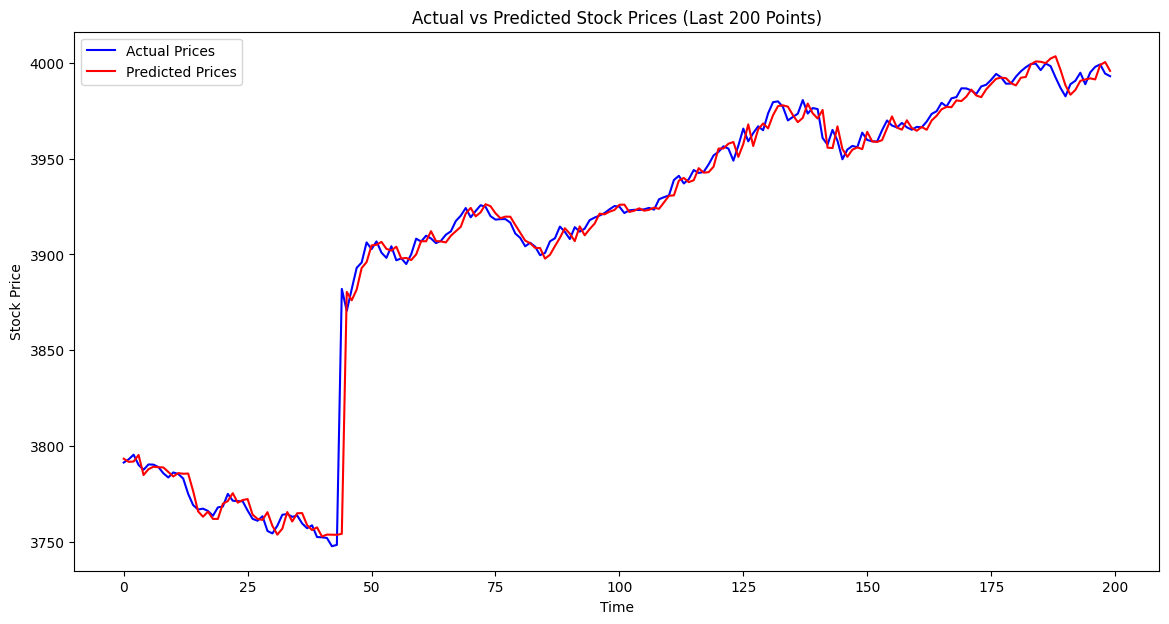

In [25]:
# Plot only a subset of the data
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[-200:], color='blue', label='Actual Prices')  # Last 100 points
plt.plot(y_pred[-200:], color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices (Last 200 Points)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
